# 範例 : 計程車費率預測
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

# [作業目標]
- 使用並觀察特徵組合, 在計程車費率預測競賽的影響

# [作業重點]
- 仿造範例並參考今日課程內容, 使用經緯度一圈的長度比的概念造出新特徵, 觀察有什麼影響 (In[6], Out[6])
- 只使用上面所造的這個新特徵, 觀察有什麼影響 (In[7], Out[7])

In [3]:
# 做完特徵工程前的所有準備
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

data_path = '/Users/bananaiselite/'
df = pd.read_csv(data_path + 'taxi_data1.csv')

train_Y = df['fare_amount']
df = df.drop(['fare_amount'] , axis=1)
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-10-21 23:54:10 UTC,-73.990580,40.761071,-73.981128,40.758634,2
1,2015-02-03 10:42:03 UTC,-73.988403,40.723431,-73.989647,40.741695,1
2,2014-03-16 18:58:58 UTC,-74.015785,40.715110,-74.012029,40.707888,2
3,2009-06-13 16:10:54 UTC,-73.977322,40.787275,-73.958030,40.778838,3
4,2014-06-12 03:25:56 UTC,-73.989683,40.729717,-73.982490,40.761887,3


In [4]:
# 時間特徵分解方式:使用datetime
df['pickup_datetime'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S UTC'))
df['pickup_year'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%Y')).astype('int64')
df['pickup_month'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%m')).astype('int64')
df['pickup_day'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%d')).astype('int64')
df['pickup_hour'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%H')).astype('int64')
df['pickup_minute'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%M')).astype('int64')
df['pickup_second'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%S')).astype('int64')
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56


In [5]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df = df.drop(['pickup_datetime'] , axis=1)
scaler = MinMaxScaler()
train_X = scaler.fit_transform(df)
Linear = LinearRegression()
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
GDBT = GradientBoostingRegressor()
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

Linear Reg Score : 0.026876871475636888
Gradient Boosting Reg Score : 0.712120852792713


In [6]:
# 增加緯度差, 經度差, 座標距離等三個特徵
# [(X-Xi)^2 + (Y-Yi)^2)]^0.5 
df['longitude_diff'] = df['dropoff_longitude'] - df['pickup_longitude']
df['latitude_diff'] = df['dropoff_latitude'] - df['pickup_latitude']
df['distance_2D'] = (df['longitude_diff']**2 + df['latitude_diff']**2)**0.5
df[['distance_2D', 'longitude_diff', 'latitude_diff', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].head()

,distance_2D,longitude_diff,latitude_diff,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,0.009761,0.009452,-0.002437,-73.990580,40.761071,-73.981128,40.758634
1,0.018307,-0.001244,0.018265,-73.988403,40.723431,-73.989647,40.741695
2,0.008140,0.003756,-0.007222,-74.015785,40.715110,-74.012029,40.707888
3,0.021056,0.019292,-0.008437,-73.977322,40.787275,-73.958030,40.778838
4,0.032964,0.007193,0.032170,-73.989683,40.729717,-73.982490,40.761887


In [7]:
# 結果 : 準確度上升
train_X = scaler.fit_transform(df)
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

Linear Reg Score : 0.027525445787303093
Gradient Boosting Reg Score : 0.8051083122532618


# 作業1
* 參考今日教材，試著使用經緯度一圈的長度比這一概念，組合出一個新特徵，再觀察原特徵加上新特徵是否提升了正確率?

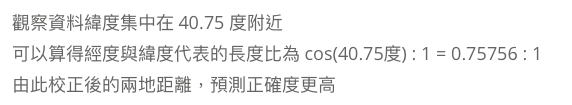

In [9]:
import math
"""
Your Code Here, set new character at df['distance_real']
"""
# latitude_diff --> latitude_diff * cos(40.75/180pi)
df['distance_real'] = (df['longitude_diff']**2 + (df['latitude_diff']*math.cos(40.75/2*math.pi))**2)**0.5

# 觀察結果 
train_X = scaler.fit_transform(df)
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

Linear Reg Score : 0.03445977439318604
Gradient Boosting Reg Score : 0.8046567332227699


# 作業2
* 試著只使用新特徵估計目標值(忽略原特徵)，效果跟作業1的結果比較起來效果如何?

In [11]:
train_X = scaler.fit_transform(df[['distance_real']])
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

Linear Reg Score : 0.001341357301862711
Gradient Boosting Reg Score : 0.683865090828856
